### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from google_play_scraper import reviews
from google_play_scraper import Sort
import matplotlib.pyplot as plt
import datetime as dt
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from pandas.api.types import CategoricalDtype

### Capturing reviews from the site

In [2]:
result,_ = reviews(
    "com.oyo.consumer",
    count=10000
)
oyo = pd.DataFrame(result,columns=["reviewId","content","score","at"])
oyo.head(3)

,reviewId,content,score,at
0,ab1beb62-1902-4c0e-9cf2-58dc4cf468e9,DO NOT BOOK FROM THIS APP. Oyo has completely ...,1,2023-01-03 11:40:52
1,864a2437-8b6d-44d9-bbf2-67cc552c277a,good,5,2023-01-03 10:43:34
2,e81980e7-3da1-4132-8982-8699499398bf,good for trip,5,2023-01-03 10:31:14


In [3]:
oyo.drop(["reviewId"],axis=1,inplace=True)
oyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  10000 non-null  object        
 1   score    10000 non-null  int64         
 2   at       10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 234.5+ KB


In [4]:
oyo.tail()

,content,score,at
9995,👍,3,2022-09-29 17:12:29
9996,Fake and fraud company ho gaya hai fast online...,1,2022-09-29 17:02:23
9997,Frood company My 437 rupe frood this company,1,2022-09-29 16:59:13
9998,ज्यादा पैसा होटल वालो से मिलकर लेते है और कस्ट...,1,2022-09-29 16:37:26
9999,nice 👍,5,2022-09-29 16:07:57


### Getting insights from the Reviews

Distribution of Ratings for the December Month


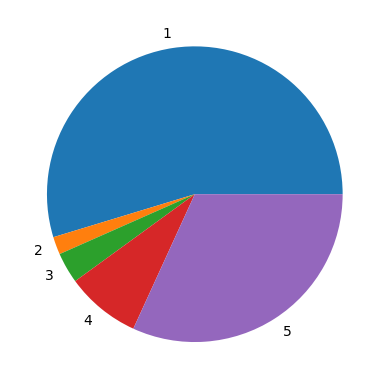

In [9]:
month1 = oyo["at"].between("2022-12-01","2023-01-01")
month2 = oyo["at"].between("2022-11-01","2022-12-01")
month3 = oyo["at"].between("2022-10-01","2022-11-01")
dec = oyo[month1]
nov = oyo[month2]
oct = oyo[month3]
print("Distribution of Ratings for the December Month")
dec.groupby('score').size().plot(kind='pie')
plt.show()

Keywords for Highest rating 5


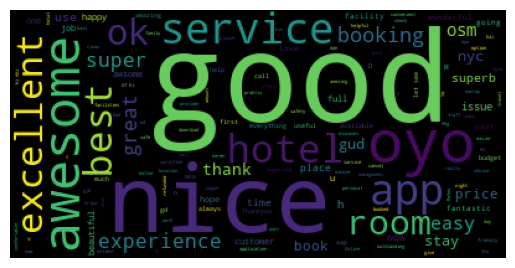

In [10]:
print("Keywords for Highest rating 5")
text = " ".join(review for review in dec[dec.score==5].content.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Keywords for worst rating 1


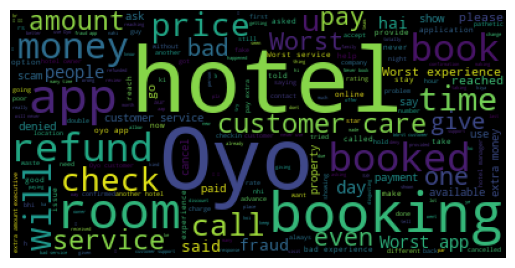

In [11]:
print("Keywords for worst rating 1")
text = " ".join(review for review in dec[dec.score==1].content.astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Number of People giving ratings on subsequent months


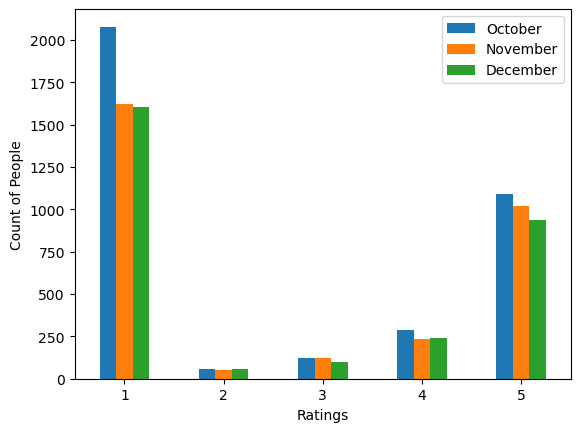

In [17]:
dec1 = dec["score"].value_counts()
dec1 = dec1.sort_index()
nov1 = nov["score"].value_counts()
nov1 = nov1.sort_index()
oct1 = oct["score"].value_counts()
oct1 = oct1.sort_index()
December = dec1.values
November = nov1.values
October = oct1.values
index = ['1','2','3','4','5']
ndf = pd.DataFrame({'October': October,'November':November,'December': December}, index=index)
ax = ndf.plot.bar(xlabel="Ratings",ylabel="Count of People",rot=0)
print("Number of People giving ratings on subsequent months")

In [22]:
oyo.head(3)

,content,score,at
0,DO NOT BOOK FROM THIS APP. Oyo has completely ...,1,2023-01-03 11:40:52
1,good,5,2023-01-03 10:43:34
2,good for trip,5,2023-01-03 10:31:14


### Setting the date as index of our Dataframe

In [26]:
oyo.set_index("at",inplace=True)
oyo.index = oyo.index.date

In [27]:
oyo.head(3)

,content,score
2023-01-03,DO NOT BOOK FROM THIS APP. Oyo has completely ...,1
2023-01-03,good,5
2023-01-03,good for trip,5


In [31]:
df = oyo.loc[pd.Timestamp("2022-12-31"):pd.Timestamp("2022-10-01")]
df.info()

C:\Users\Prashant\AppData\Local\Temp\ipykernel_27672\4042227673.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = oyo.loc[pd.Timestamp("2022-12-31"):pd.Timestamp("2022-10-01")]


<class 'pandas.core.frame.DataFrame'>
Index: 9627 entries, 2022-12-31 to 2022-10-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9627 non-null   object
 1   score    9627 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 225.6+ KB


### Converting index to datetime object

In [42]:
df.index=pd.to_datetime(df.index)  

In [44]:
df["week"]=df.index.week

C:\Users\Prashant\AppData\Local\Temp\ipykernel_27672\595253459.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df["week"]=df.index.week
C:\Users\Prashant\AppData\Local\Temp\ipykernel_27672\595253459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"]=df.index.week


In [45]:
df.head(3)

,content,score,week
2022-12-31,बहुत ही बकवास ऐप। अगर किसी को अपनी बेइज्जती कर...,1,52
2022-12-31,Worst app ... Hostel manager take extra paymen...,1,52
2022-12-31,Very bad experience...,1,52


### Getting mean of ratings over the weeks

Showing moving average of ratings over the weeks


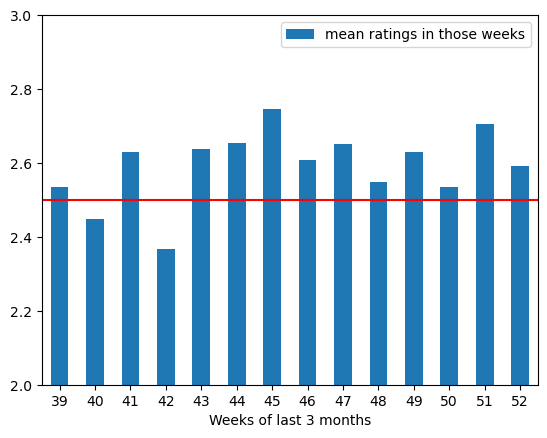

In [50]:
x = df.groupby("week").score.mean()
df_mean = pd.DataFrame({'Weeks of last 3 months':x.index, 'mean ratings in those weeks':x.values})
ax = df_mean.plot.bar(x='Weeks of last 3 months', y='mean ratings in those weeks',ylim=(2,3), rot=0)
plt.axhline(y=2.5,color='red')
print("Showing moving average of ratings over the weeks")
plt.show()

### Weekly analysis of number of reviews and ratings

In [55]:
df["dayname"] = df.index.day_name()

C:\Users\Prashant\AppData\Local\Temp\ipykernel_27672\2257730061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dayname"] = df.index.day_name()


Weekly analysis of ratings and reviews
Timeperiod between 2023-01-01 00:00:00 and 2022-12-25 00:00:00


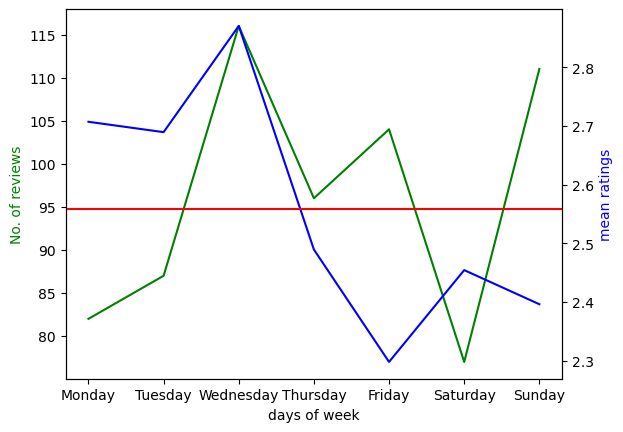

Timeperiod between 2022-12-25 00:00:00 and 2022-12-18 00:00:00


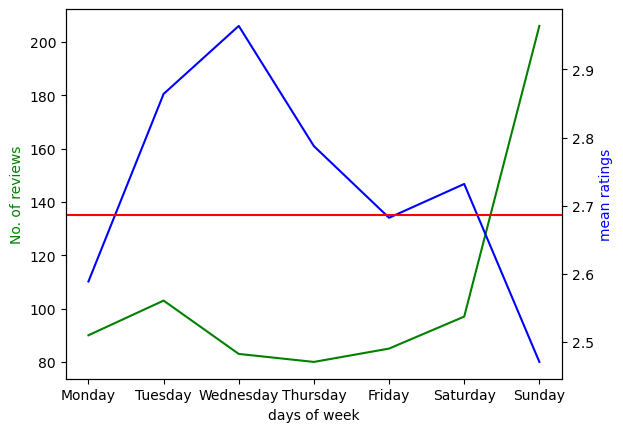

Timeperiod between 2022-12-18 00:00:00 and 2022-12-11 00:00:00


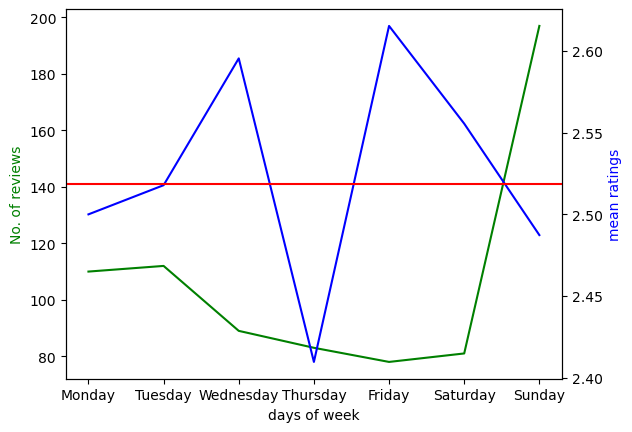

Timeperiod between 2022-12-11 00:00:00 and 2022-12-04 00:00:00


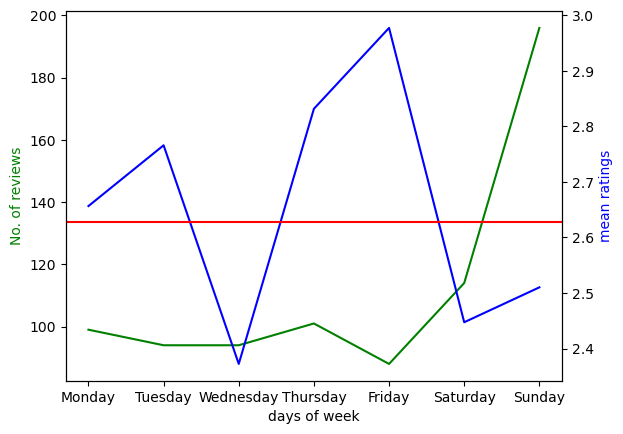

Timeperiod between 2022-12-04 00:00:00 and 2022-11-27 00:00:00


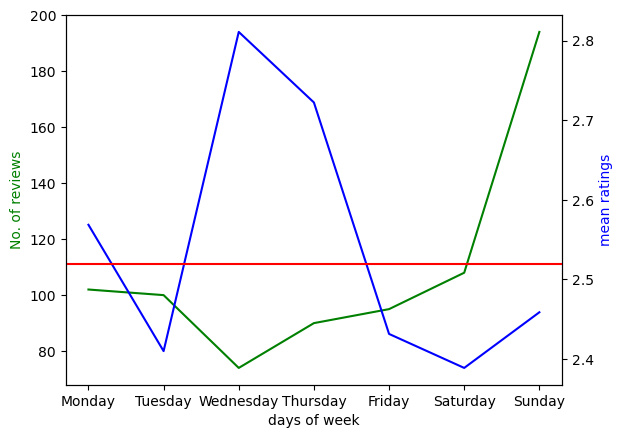

In [59]:
timea = pd.Timestamp("2023-01-01")
period = pd.Timedelta(days=7)
sorter = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
print("Weekly analysis of ratings and reviews")
while timea > pd.Timestamp("2022-11-30"):
    timeb = timea - period
    print("Timeperiod between "+str(timea)+" and "+str(timeb))
    tdf = df.loc[timea:timeb]
    tndf = tdf.drop("content",axis=1)
    d1 = tndf.groupby("dayname").score.count()
    d2 = tndf.groupby("dayname").score.mean()
    val1 = tndf.score.mean()
    d1 = d1.to_frame()
    d2 = d2.to_frame()
    d1["day_id"] = d1.index
    d1["day_id"] = d1["day_id"].map(sorterIndex)
    d1.sort_values("day_id", inplace=True)
    x = d1.index
    y1 = d1.values[0:7,0]
    d2["day_id"] = d2.index
    d2["day_id"] = d2["day_id"].map(sorterIndex)
    d2.sort_values("day_id", inplace=True)
    y2 = d2.values[0:7,0]
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(x, y1, 'g-')
    ax2.plot(x, y2, 'b-')
    ax1.set_xlabel('days of week')
    ax1.set_ylabel('No. of reviews', color='g')
    ax2.set_ylabel('mean ratings', color='b')
    plt.axhline(y=val1,color='red')
    plt.show()
    timea = timea - period